# **application baseline**

## 라이브러리 및 데이터 로드

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import os, gc, sys
import time
import random
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('seaborn')

import warnings
warnings.filterwarnings(action='ignore')

from sklearn.model_selection import KFold, StratifiedKFold

In [3]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 300)
pd.set_option('display.max_colwidth', 30)

In [28]:

path = '/content/drive/MyDrive/kaggle/home_credit_default_risk'

app_train = pd.read_csv(os.path.join(path, 'application_train.csv'))
app_test = pd.read_csv(os.path.join(path, 'application_test.csv'))


In [ ]:
print(app_train.shape, app_test.shape)
app_train.head()

(307511, 122) (48744, 121)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

## 데이터 세트 기본 분석 

**TARGET 별 분포도**

In [ ]:
app_train['TARGET'].value_counts() / app_train.shape[0] * 100

0    91.927118
1     8.072882
Name: TARGET, dtype: float64

**AMT_INCOME_TOTAL**

(array([3.07508e+05, 2.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([2.56500000e+04, 1.17230850e+07, 2.34205200e+07, 3.51179550e+07,
        4.68153900e+07, 5.85128250e+07, 7.02102600e+07, 8.19076950e+07,
        9.36051300e+07, 1.05302565e+08, 1.17000000e+08]),
 <a list of 10 Patch objects>)

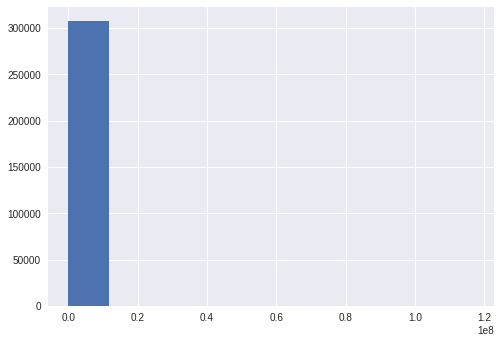

In [ ]:
plt.hist(app_train['AMT_INCOME_TOTAL'])

- AMT_INCOME_TOTAL 1000000 이하 분포도

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


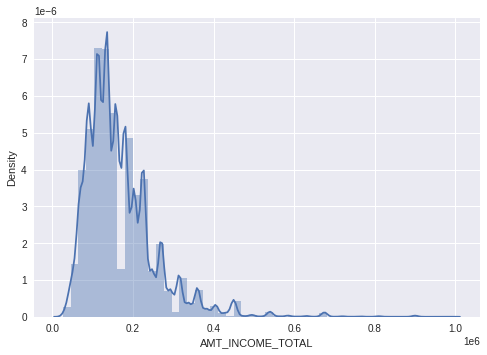

In [ ]:
cond_1 = app_train['AMT_INCOME_TOTAL'] < 1000000
sns.distplot(app_train[cond_1]['AMT_INCOME_TOTAL'])

**TARGET 값 별 AMT_INCOME_TOTAL 분포도**

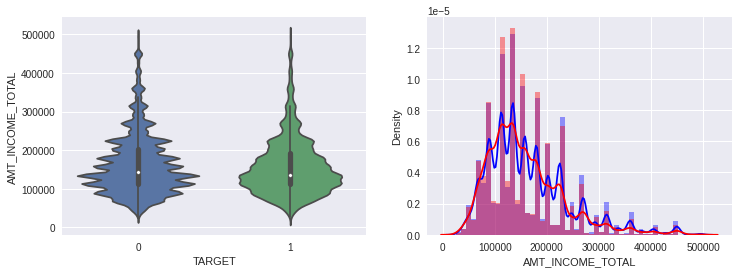

In [ ]:
cond_1 = (app_train['TARGET'] == 1)
cond_0 = (app_train['TARGET'] == 0)
cond_AMT = (app_train['AMT_INCOME_TOTAL'] < 500000)

# visualize
fig, axes = plt.subplots(1, 2, figsize=(12,4), squeeze=False)
sns.violinplot(x='TARGET', y='AMT_INCOME_TOTAL', data=app_train[cond_AMT], ax=axes[0][0])
sns.distplot(app_train[cond_0 & cond_AMT]['AMT_INCOME_TOTAL'], ax=axes[0][1], label='0', color='blue')
sns.distplot(app_train[cond_1 & cond_AMT]['AMT_INCOME_TOTAL'], ax=axes[0][1], label='1', color='red')

## 데이터 preprocessing

In [5]:
# app_train과 app_test 결합
apps = pd.concat([app_train, app_test])
apps.shape

(356255, 122)

**Object feaure Label Encoding**

In [6]:
object_columns = apps.dtypes[apps.dtypes == 'object'].index.tolist()

In [7]:
object_columns

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE',
 'FONDKAPREMONT_MODE',
 'HOUSETYPE_MODE',
 'WALLSMATERIAL_MODE',
 'EMERGENCYSTATE_MODE']

In [8]:
# facotrize()
pd.factorize(apps['CODE_GENDER'])

(array([0, 1, 0, ..., 1, 0, 1]), Index(['M', 'F', 'XNA'], dtype='object'))

In [9]:
for column in object_columns:
  apps[column] = pd.factorize(apps[column])[0]

## NULL값 일괄 변환

In [10]:
apps.isnull().sum().head(10)

SK_ID_CURR                0
TARGET                48744
NAME_CONTRACT_TYPE        0
CODE_GENDER               0
FLAG_OWN_CAR              0
FLAG_OWN_REALTY           0
CNT_CHILDREN              0
AMT_INCOME_TOTAL          0
AMT_CREDIT                0
AMT_ANNUITY              36
dtype: int64

In [11]:
# -999로 변환
apps = apps.fillna(-999)

## train, test 데이터 셋 분리

In [12]:
app_train = apps[apps['TARGET'] != -999]
app_test = apps[apps['TARGET'] == -999]

In [13]:
app_train.shape, app_test.shape

((307511, 122), (48744, 122))

In [14]:
# app_test의 TARGET 칼럼 drop
app_test = app_test.drop('TARGET', axis=1)

In [15]:
app_test.shape

(48744, 121)

## train 데이터 학습, 검증 데이터로 분리

In [16]:
ftr_app = app_train.drop(['SK_ID_CURR', 'TARGET'], axis=1)
target_app = app_train['TARGET']

In [17]:
from sklearn.model_selection import train_test_split

train_x, valid_x, train_y, valid_y = train_test_split(ftr_app, target_app, test_size=0.3, random_state=980216)
train_x.shape, valid_x.shape

((215257, 120), (92254, 120))

## LGBM Classifier 학습

In [18]:
from lightgbm import LGBMClassifier

clf = LGBMClassifier(
        n_jobs=-1,
        n_estimators=1000,
        learning_rate=0.02,
        num_leaves=32,
        subsample=0.8,
        max_depth=12,
        silent=-1,
        verbose=-1
        )

clf.fit(train_x, train_y, eval_set=[(train_x, train_y), (valid_x, valid_y)],
        eval_metric = 'auc', verbose=100, early_stopping_rounds=50)

Training until validation scores don't improve for 50 rounds.
[100]	training's auc: 0.752986	training's binary_logloss: 0.250717	valid_1's auc: 0.74138	valid_1's binary_logloss: 0.250865
[200]	training's auc: 0.772416	training's binary_logloss: 0.243883	valid_1's auc: 0.752293	valid_1's binary_logloss: 0.246765
[300]	training's auc: 0.785634	training's binary_logloss: 0.239638	valid_1's auc: 0.756046	valid_1's binary_logloss: 0.245365
[400]	training's auc: 0.797614	training's binary_logloss: 0.236152	valid_1's auc: 0.757353	valid_1's binary_logloss: 0.24485
[500]	training's auc: 0.807383	training's binary_logloss: 0.233215	valid_1's auc: 0.757967	valid_1's binary_logloss: 0.244622
Early stopping, best iteration is:
[470]	training's auc: 0.804535	training's binary_logloss: 0.234059	valid_1's auc: 0.757999	valid_1's binary_logloss: 0.244632


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.02, max_depth=12,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=1000, n_jobs=-1, num_leaves=32, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=-1,
               subsample=0.8, subsample_for_bin=200000, subsample_freq=0,
               verbose=-1)

## Feature Selection

### Shap value

In [19]:
!pip install shap

     |████████████████████████████████| 356 kB 27.1 MB/s 
  Created wheel for shap: filename=shap-0.39.0-cp37-cp37m-linux_x86_64.whl size=491644 sha256=7bfde2c1a07d2524a37bbbf1cca6eb266435d59e5283c26781d8fa104e2af76c
  Stored in directory: /root/.cache/pip/wheels/ca/25/8f/6ae5df62c32651cd719e972e738a8aaa4a87414c4d2b14c9c0
Successfully built shap


In [20]:
import shap
explainer = shap.TreeExplainer(clf) #  Shap Value  객체 지정
shap_values = explainer.shap_values(valid_x) # Shap Values 계산

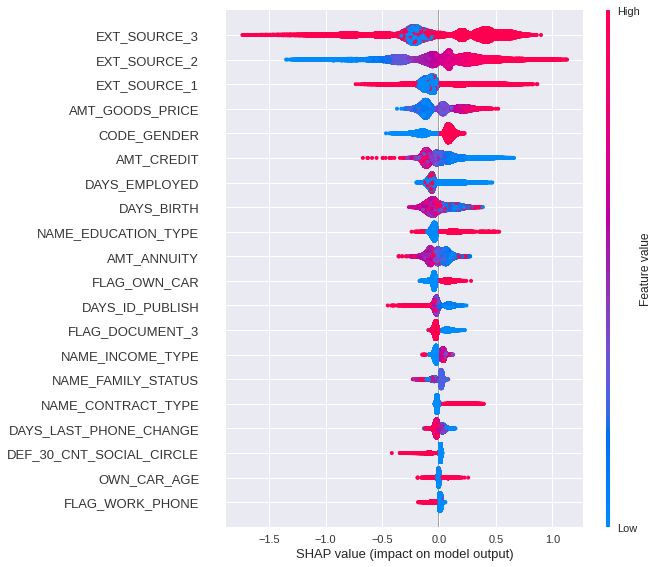

In [22]:
# summary
shap.summary_plot(shap_values[0], valid_x)

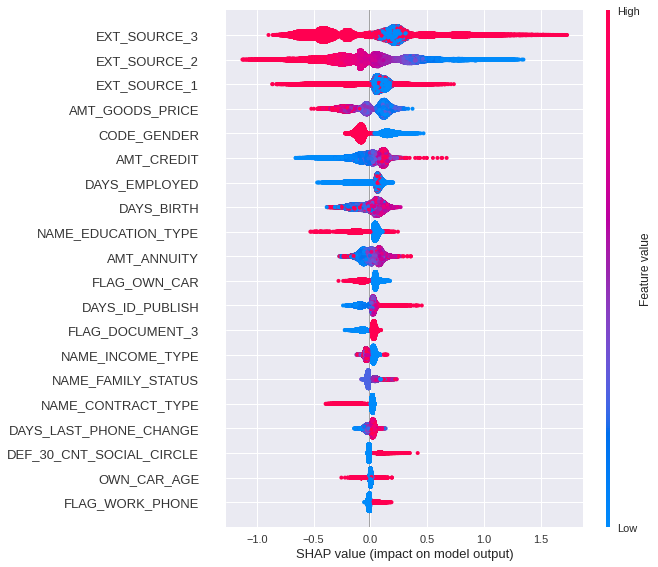

In [23]:
shap.summary_plot(shap_values[1], valid_x)

## 테스트 데이터 예측

In [ ]:
# train 셋이 'SK_ID_CURR'이 drop되어있으므로 test도 drop
preds = clf.predict_proba(app_test.drop(['SK_ID_CURR'], axis=1))

In [ ]:
preds

array([[0.96483918, 0.03516082],
       [0.89808233, 0.10191767],
       [0.98307246, 0.01692754],
       ...,
       [0.96141388, 0.03858612],
       [0.92426619, 0.07573381],
       [0.81503809, 0.18496191]])

In [ ]:
# kaggle 제출 양식은 1일때의 확률만 필요
preds = preds[:, 1]

In [ ]:
app_test['TARGET'] = preds
app_test['TARGET'].head()

0    0.035161
1    0.101918
2    0.016928
3    0.034052
4    0.134446
Name: TARGET, dtype: float64

## csv 생성

In [ ]:
app_test[['SK_ID_CURR','TARGET']].to_csv(os.path.join(path, 'application_baseline_1.csv'), index=False)

In [ ]:
!ls '/content/drive/MyDrive/kaggle/home_credit_default_risk'

application_baseline_1.csv  credit_card_balance.csv
application_baseline.ipynb  HomeCredit_columns_description.csv
application_test.csv	    installments_payments.csv
application_train.csv	    POS_CASH_balance.csv
bureau_balance.csv	    previous_application.csv
bureau.csv		    sample_submission.csv


# **Feature Engineering**

## 연속형 feature 시각화

In [30]:
num_columns = app_train.dtypes[app_train.dtypes != 'object'].index.tolist()

In [26]:
# feature 별 TARGET 값에 따른 분포도 시각화 함수 
def show_hist_by_target(df, columns):
  cond_1 = (df['TARGET'] == 1)
  cond_0 = (df['TARGET'] == 0)

  for column in columns:
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,4), squeeze=False)
    sns.violinplot(x='TARGET', y=column, data=df, ax=axes[0][0])
    sns.distplot(df[cond_1][column], ax=axes[0][1], label='1', color='red')
    sns.distplot(df[cond_0][column], ax=axes[0][1], label='0', color='blue')

In [36]:
# feature selection을 통해 얻어진 column
columns = ["EXT_SOURCE_3", "EXT_SOURCE_2" , "EXT_SOURCE_1", "AMT_GOODS_PRICE",  "AMT_CREDIT", "DAYS_EMPLOYED", "DAYS_BIRTH",  "AMT_ANNUITY",  "DAYS_ID_PUBLISH"]

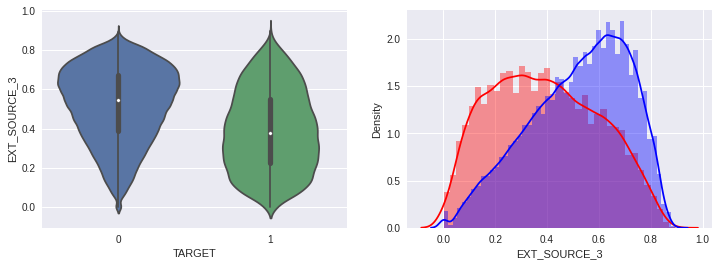

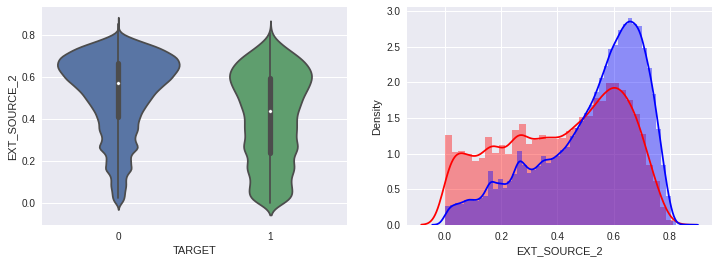

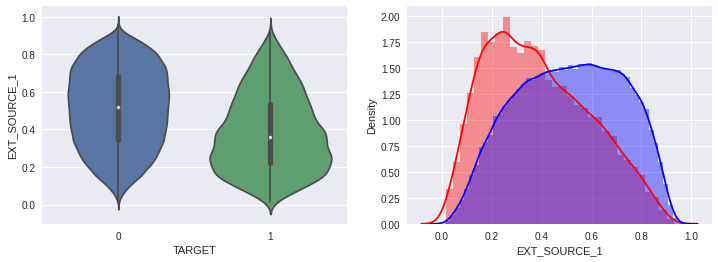

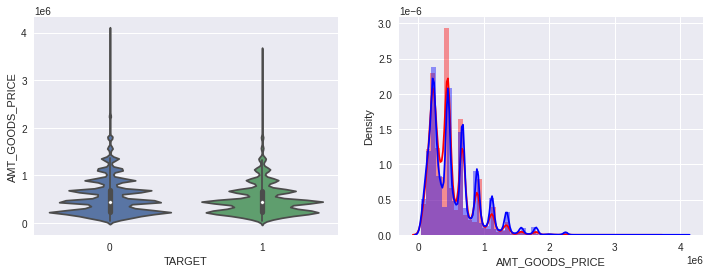

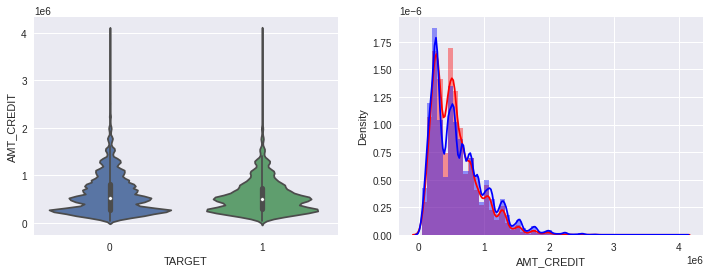

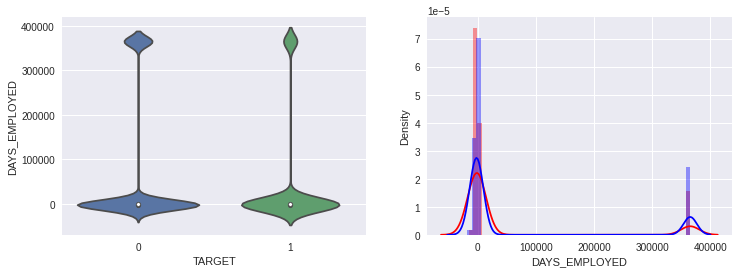

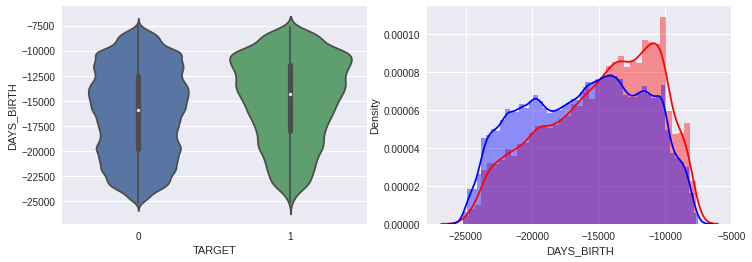

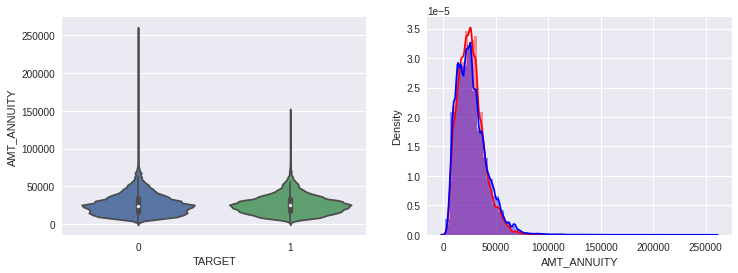

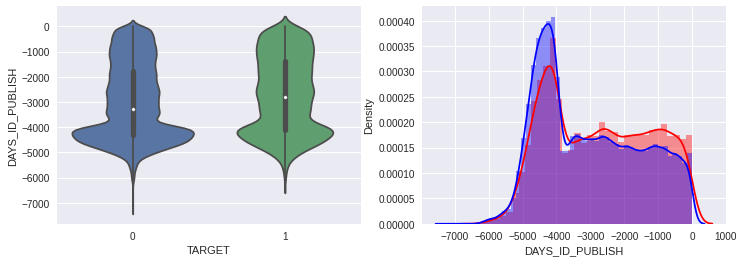

In [37]:
show_hist_by_target(app_train, columns)

- EXR_SOURCE_1,2,3은 TARGET값에 따라 차이가 존재
- DAYS_BIRTH는 TARGET=1일 때, 젊은 연령대가 TARGRT=0일 때보다 상대적으로 많음
- DAYS_ID_PUBLISH는 TARGET=1일 때가 최근 값들이 조금 더 많음
- 나머지 컬럼들은 차이가 눈에 띄게 나타나지 않음

## TARGRT과 주요 연속형 feature 상관도 분석

In [81]:
corr_columns = ['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'AMT_INCOME_TOTAL','DAYS_BIRTH', 'DAYS_ID_PUBLISH','TARGET']

corr = app_train[corr_columns].corr()
mask = np.triu(np.ones_like(corr))

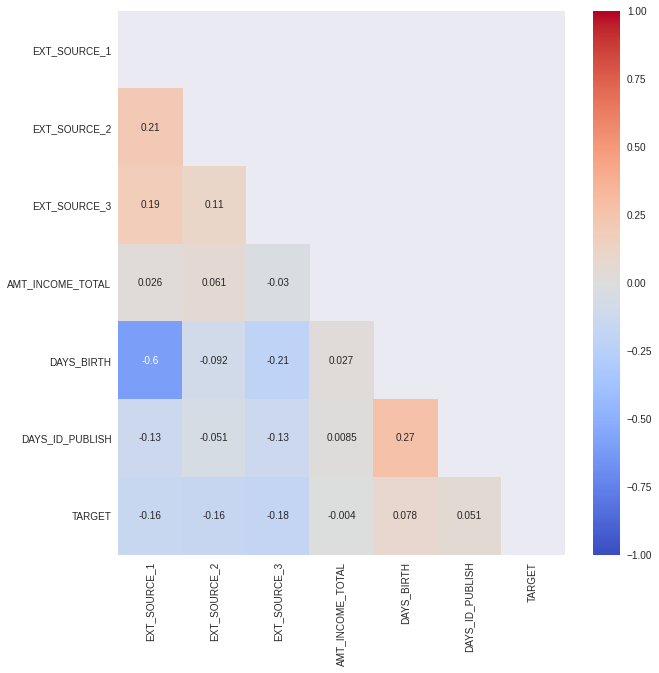

In [82]:
plt.figure(figsize=(10,10))
sns.heatmap(corr, cmap='coolwarm', vmax=1, vmin=-1, mask=mask, annot=True)

## Category Feature 시각화

In [38]:
object_columns = app_train.dtypes[app_train.dtypes == 'object'].index.tolist()
object_columns

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE',
 'FONDKAPREMONT_MODE',
 'HOUSETYPE_MODE',
 'WALLSMATERIAL_MODE',
 'EMERGENCYSTATE_MODE']

In [44]:
def show_category_by_target(df, columns):
  for column in columns:
    chart = sns.catplot(x=column, col="TARGET", data=app_train, kind='count')
    chart.set_xticklabels(rotation=60)

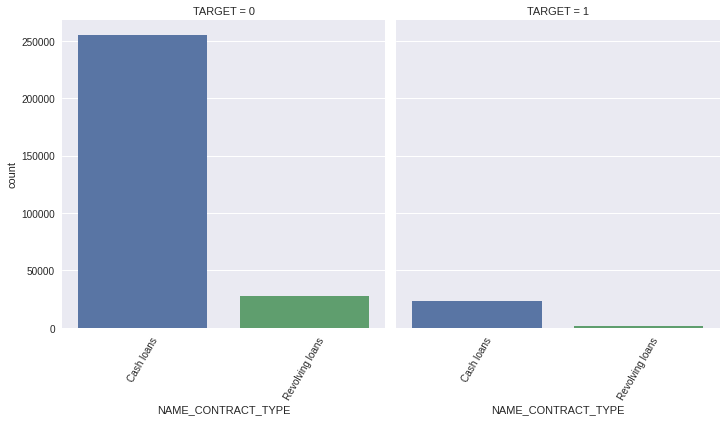

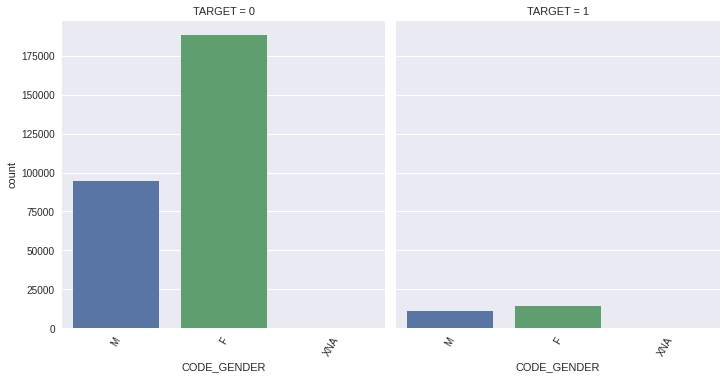

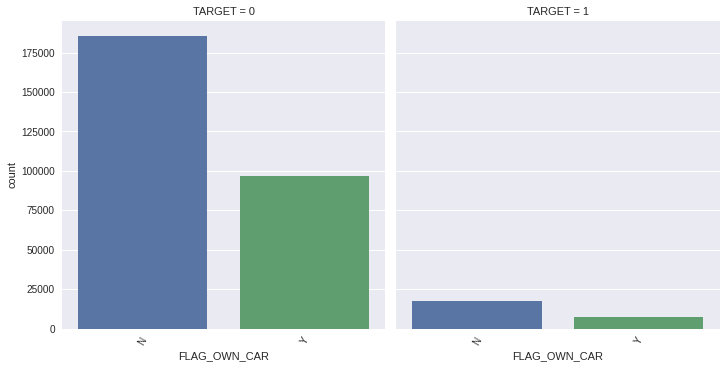

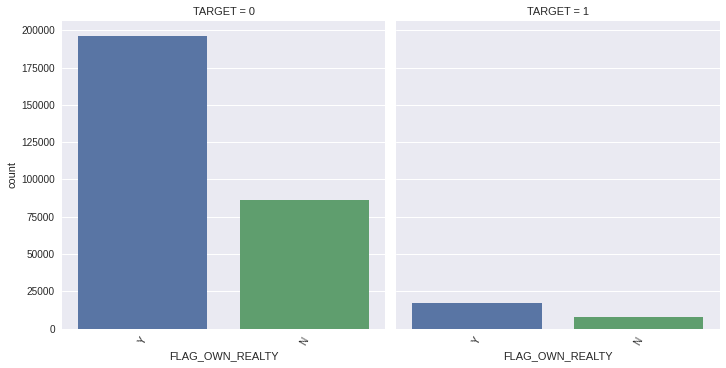

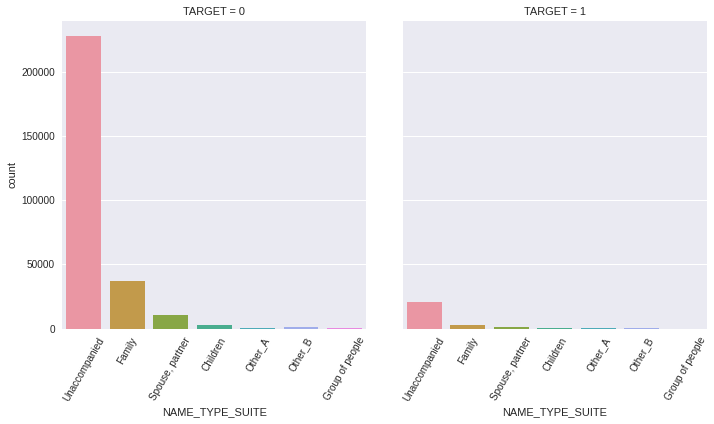

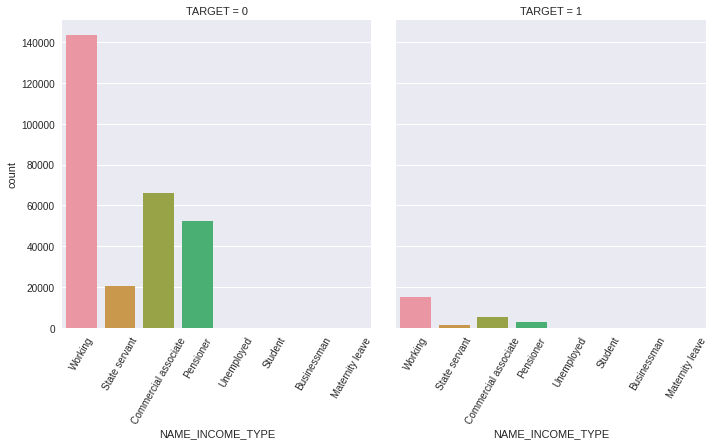

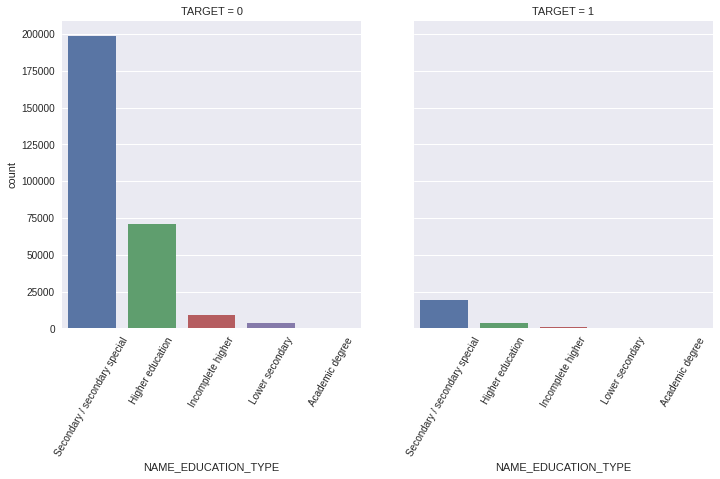

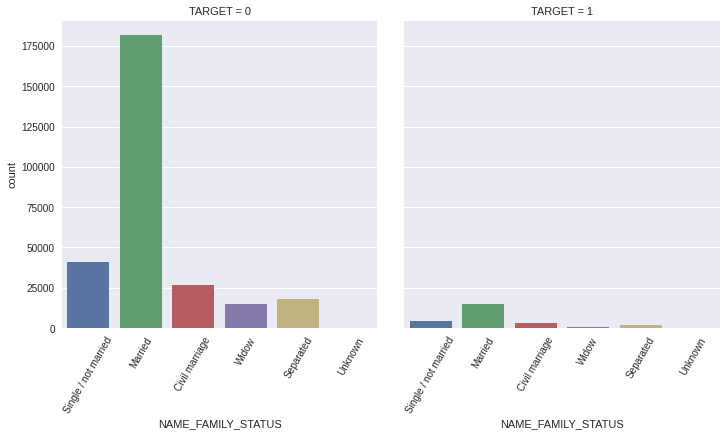

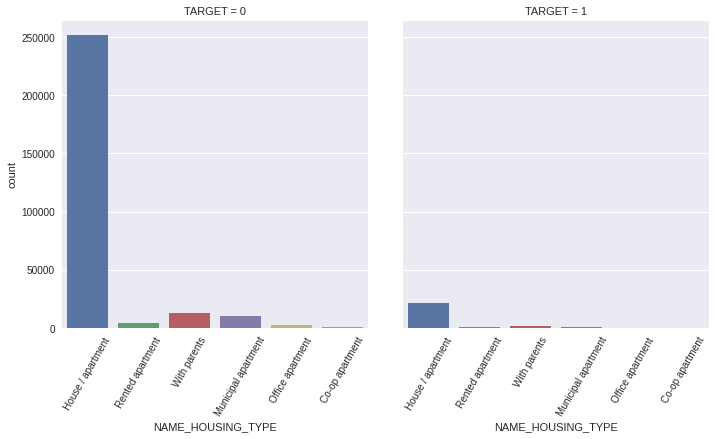

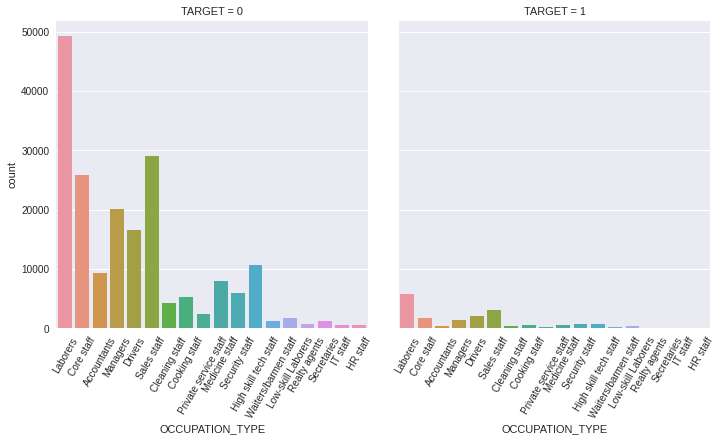

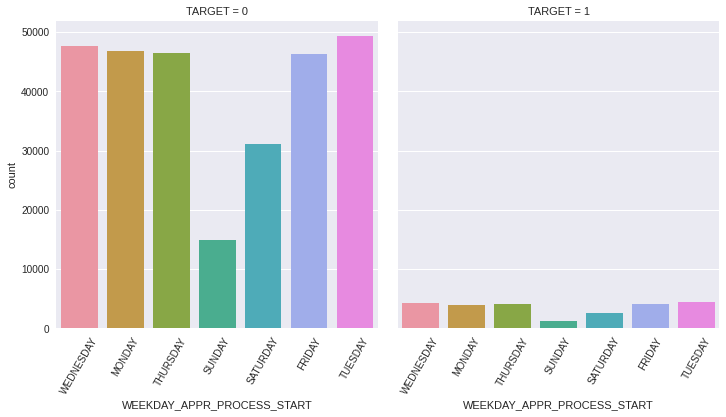

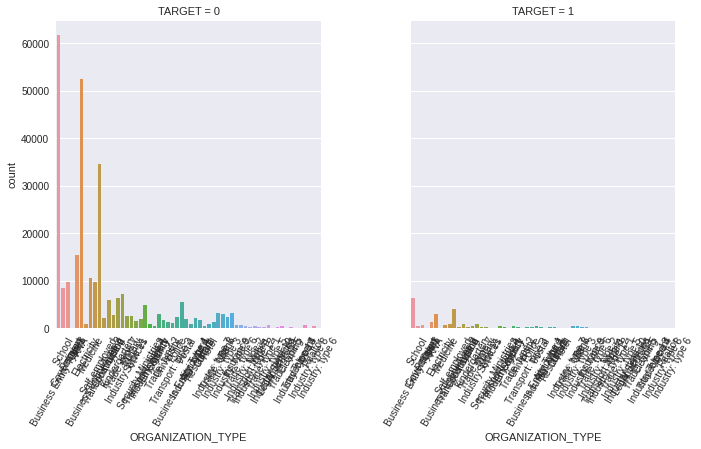

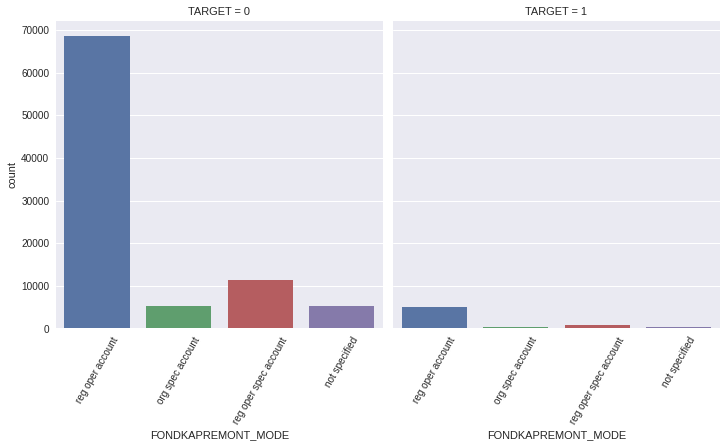

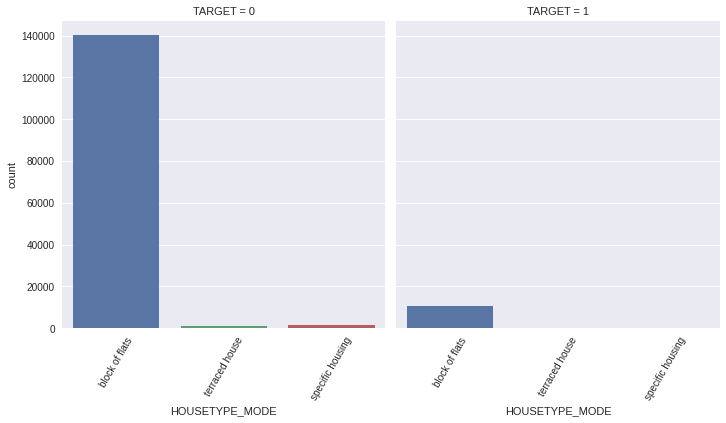

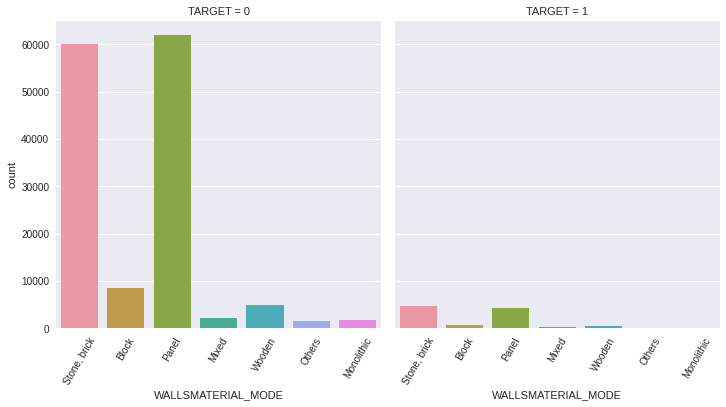

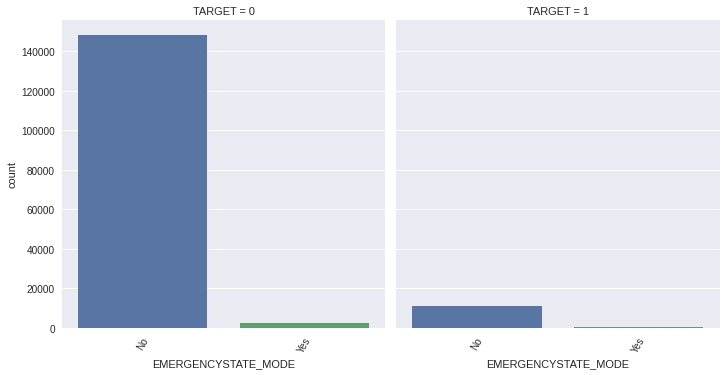

In [45]:
show_category_by_target(app_train, object_columns)

- CODE_GENDER

In [52]:
cond_1 = (app_train['TARGET'] == 1)
cond_0 = (app_train['TARGET'] == 0)
cond_f = (app_train['CODE_GENDER'] == 'F')
cond_m = (app_train['CODE_GENDER'] == 'M')

# 전체 건수 대비 여성, 남성의 비율
print(app_train['CODE_GENDER'].value_counts()/app_train.shape[0],'\n')

# TARGET=1(연체)일 경우, 여성과 남성의 비율
print(app_train[cond_1]['CODE_GENDER'].value_counts()/app_train[cond_1].shape[0],'\n')

# TARGET=0 일 경우, 여성과 남성의 비율
print(app_train[cond_0]['CODE_GENDER'].value_counts()/app_train[cond_0].shape[0])

F      0.658344
M      0.341643
XNA    0.000013
Name: CODE_GENDER, dtype: float64 

F    0.570796
M    0.429204
Name: CODE_GENDER, dtype: float64 

F      0.666032
M      0.333954
XNA    0.000014
Name: CODE_GENDER, dtype: float64


In [53]:
app_train[cond_1]['CODE_GENDER'].value_counts()/ app_train['CODE_GENDER'].value_counts()

F      0.069993
M      0.101419
XNA         NaN
Name: CODE_GENDER, dtype: float64

대출 횟수 대비 연체 비율이 M(남성)이 F(여성)보다 높음

## 이상치 데이터 확인 및 변경

In [63]:
app_train['DAYS_EMPLOYED'].value_counts()

 365243    55374
-200         156
-224         152
-199         151
-230         151
           ...  
-11115         1
-11371         1
-11883         1
-13536         1
-8795          1
Name: DAYS_EMPLOYED, Length: 12574, dtype: int64

365243은 1000년이 넘는 이상치이므로 NAN으로 변경

In [65]:
app_train['DAYS_EMPLOYED'] = app_train['DAYS_EMPLOYED'].replace( 365243, np.nan )
app_train['DAYS_EMPLOYED'].value_counts()

-200.0      156
-224.0      152
-230.0      151
-199.0      151
-212.0      150
           ... 
-8868.0       1
-13006.0      1
-10261.0      1
-14079.0      1
-9062.0       1
Name: DAYS_EMPLOYED, Length: 12573, dtype: int64

In [69]:
app_train['CODE_GENDER'].value_counts(dropna=False)

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

CODE_GENDER은 NA값이 4개로 적은 수에 불과함

## EXT_SOURCE feature engineering

EXT_SOURCE_1,2,3 : Normalized score from external data source

In [75]:
# feature engineering 전 학습, 테스트 용 데이터 세트 결합
apps = pd.concat([app_train, app_test])
apps.shape

(356255, 122)

In [76]:
apps[['EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3']].isnull().sum()

EXT_SOURCE_1    193910
EXT_SOURCE_2       668
EXT_SOURCE_3     69633
dtype: int64

In [78]:
# EXT_SOURCE_1,2,3 feature를 결합하여 평균, 표준편차 feature 생성
apps['APPS_EXT_SOURCE_MEAN'] = apps[['EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3']].mean(axis=1)
apps['APPS_EXT_SOURCE_STD'] = apps[['EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3']].std(axis=1)

In [79]:
apps['APPS_EXT_SOURCE_STD'].isnull().sum()

40950

In [80]:
# APPS_EXT_SOURCE_STD의 NULL값의 경우, APPS_EXT_SOURCE_STD의 평균으로 변경
apps['APPS_EXT_SOURCE_STD'] = apps['APPS_EXT_SOURCE_STD'].fillna(apps['APPS_EXT_SOURCE_STD'].mean())
apps['APPS_EXT_SOURCE_STD'].isnull().sum()

0

## AMT_INCOME_TOTAL feature engineering
AMT_INCOME_TOTAL : Income of the client

In [83]:
# 연금 대출 / 소득 비율
apps['APPS_ANNUITY_INCOME_RATIO'] = apps['AMT_ANNUITY']/apps['AMT_INCOME_TOTAL']

# 신용 대출 / 소득 비율
apps['APPS_CREDIT_INCOME_RATIO'] = apps['AMT_CREDIT']/apps['AMT_INCOME_TOTAL']

# 가족 수를 고려한 소득 
apps['APPS_CNT_FAM_INCOME_RATIO'] = apps['AMT_INCOME_TOTAL'] / apps['CNT_FAM_MEMBERS']

## DAYS_BIRTH, DAYS_EMPLOYED featuring engineering

In [84]:
# 근무 일수 / 나이
apps['APPS_EMPLOYED_BIRTH_RATIO'] = apps['DAYS_EMPLOYED'] / apps['DAYS_BIRTH']

# 소득 / 근무 일수 
apps['APPS_INCOME_EMPLOYED_RATIO'] = apps['AMT_INCOME_TOTAL'] / apps['DAYS_EMPLOYED']

# 소득 / 나이
apps['APPS_INCOME_BIRTH_RATIO'] = apps['AMT_INCOME_TOTAL'] / apps['DAYS_BIRTH']

# 자차 년도 / 나이
apps['APPS_CAR_BIRTH_RATIO'] = apps['OWN_CAR_AGE'] / apps['DAYS_BIRTH']

# 자차 년도 / 근무 일수
apps['APPS_CAR_EMPLOYED_RATIO'] = apps['OWN_CAR_AGE'] / apps['DAYS_EMPLOYED']

## Object column factorize

In [85]:
object_columns = apps.dtypes[apps.dtypes == 'object'].index.tolist()
for column in object_columns:
  apps[column] = pd.factorize(apps[column])[0]

# **LGBM Classifier 학습 after feature engineering**

## 학습 데이터, 테스트 데이터 분리

In [89]:
apps_train = apps[~apps['TARGET'].isnull()]
apps_test = apps[apps['TARGET'].isnull()]

apps_test = apps_test.drop('TARGET', axis=1)

## 학습 데이터, 검증 데이터로 분리 및 학습 수행

In [90]:
from sklearn.model_selection import train_test_split

ftr_app = apps_train.drop(['SK_ID_CURR', 'TARGET'], axis=1)
target_app = app_train['TARGET']

train_x, valid_x, train_y, valid_y = train_test_split(ftr_app, target_app, test_size=0.3, random_state=980216)
train_x.shape, valid_x.shape

((215257, 130), (92254, 130))

In [91]:
from lightgbm import LGBMClassifier

clf = LGBMClassifier(
        n_jobs=-1,
        n_estimators=1000,
        learning_rate=0.02,
        num_leaves=32,
        subsample=0.8,
        max_depth=12,
        silent=-1,
        verbose=-1
        )

clf.fit(train_x, train_y, eval_set=[(train_x, train_y), (valid_x, valid_y)], 
        eval_metric='auc', verbose=100, early_stopping_rounds= 100)

Training until validation scores don't improve for 100 rounds.
[100]	training's auc: 0.756007	training's binary_logloss: 0.249096	valid_1's auc: 0.7463	valid_1's binary_logloss: 0.249255
[200]	training's auc: 0.775435	training's binary_logloss: 0.242553	valid_1's auc: 0.754826	valid_1's binary_logloss: 0.245866
[300]	training's auc: 0.789385	training's binary_logloss: 0.238105	valid_1's auc: 0.758304	valid_1's binary_logloss: 0.244698
[400]	training's auc: 0.801427	training's binary_logloss: 0.2345	valid_1's auc: 0.75953	valid_1's binary_logloss: 0.244268
[500]	training's auc: 0.812319	training's binary_logloss: 0.231273	valid_1's auc: 0.759896	valid_1's binary_logloss: 0.244107
[600]	training's auc: 0.82236	training's binary_logloss: 0.228204	valid_1's auc: 0.760258	valid_1's binary_logloss: 0.243991
[700]	training's auc: 0.831266	training's binary_logloss: 0.22529	valid_1's auc: 0.760469	valid_1's binary_logloss: 0.243939
[800]	training's auc: 0.839184	training's binary_logloss: 0.22

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.02, max_depth=12,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=1000, n_jobs=-1, num_leaves=32, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=-1,
               subsample=0.8, subsample_for_bin=200000, subsample_freq=0,
               verbose=-1)

## Shap value

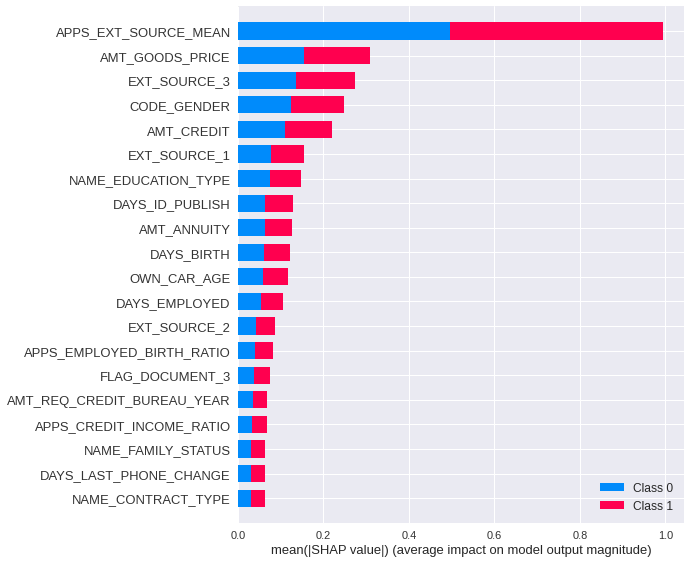

In [93]:
explainer = shap.TreeExplainer(clf)
shap_values = explainer.shap_values(valid_x)
shap.summary_plot(shap_values, valid_x)

# 테스트 데이터 예측

In [94]:
preds = clf.predict_proba(apps_test.drop(['SK_ID_CURR'], axis=1))[:, 1]

In [96]:
app_test['TARGET'] = preds
app_test[['SK_ID_CURR','TARGET']].to_csv(os.path.join(path, 'application_baseline_2.csv'), index=False)